In [3]:
# load necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median, mean

We'll be working with the ***120 years of Olympic History*** dataset acquired by Randi Griffin from https://www.sports-reference.com/. 

Full description of this dataset you can find here: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results 

Our assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:
1. Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2. Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3. Find out which national teams won the largest number of medals in the top five sports in 2016.
4. Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

**Your assignment** is to build 3 extra vizualisation. It can be, for example the same, but **for another year**.

In [4]:
# The dataset is in my Google Drive. So I mout my drive for reading data.
# You can do as me, but another way - you can douwndoal the data to the local folder,
# and read it trom this folder.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Full 
# Read the dataset as a pandas DataFrame:
olympics_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Data/athlete_events.csv")
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
# Filter the DataFrame to contain only medal winners of the year 2016

# 1. Filter the DataFrame to contain medal winners only (for non-winners, the Medal feature is NaN)
# note use of the inplace parameter

olympics_winners = olympics_df.dropna(subset=['Medal'])
olympics_winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [7]:
# 2. Print the number of medals awarded in each sport in 2016:
# print records for each value of the feature 'Sport'
olympics_winners_2016 = olympics_winners[(olympics_winners.Year == 2016)]
olympics_winners_2016.Sport.value_counts()


Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: Sport, d

In [8]:
# Note the top five sports based on the largest number of medals awarded in the 
# year 2016, and then create a DataFrame to include only these sports:

# 3. List the top 5 sports
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
# subset the DataFrame to include data from the top sports
olympics_top_sports_winners_2016 = olympics_winners_2016[(olympics_winners_2016.Sport.isin(top_sports))]
olympics_top_sports_winners_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


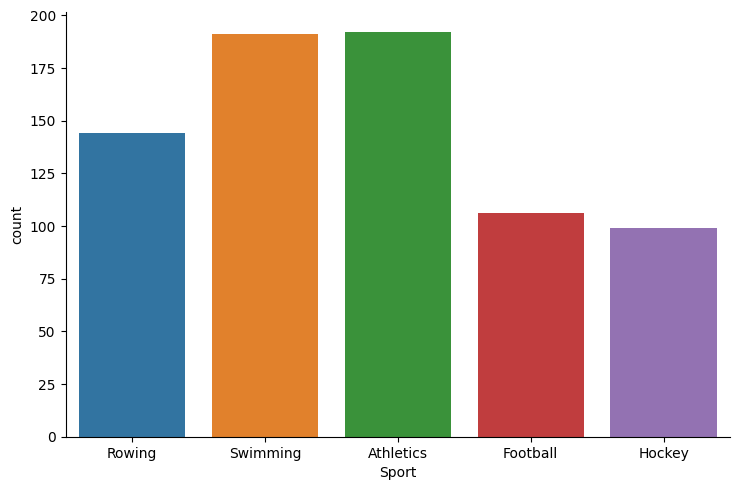

In [9]:
# Generate a bar plot of 2016 medal winners across the top five sports:
# generate bar plot indicating count of medals awarded in each of the top sports
sns.catplot(data=olympics_top_sports_winners_2016, x = 'Sport',  kind="count", aspect=1.5)

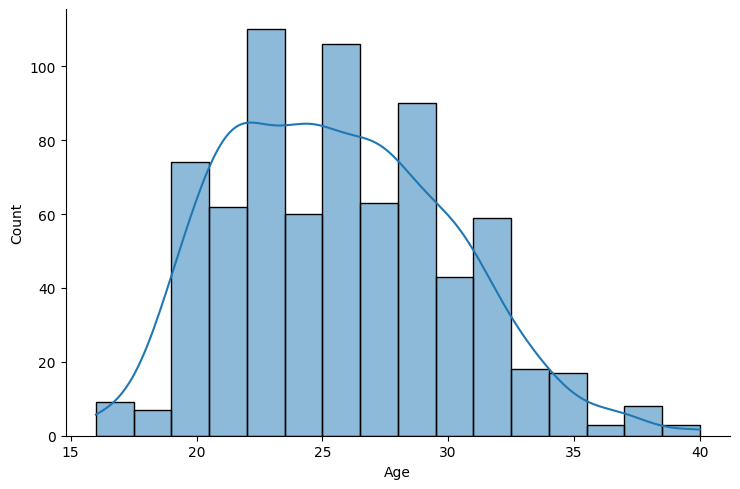

In [11]:
# Generate a histogram for the Age feature of all athletes who competed in the top five sports in 2016:
sns.displot(olympics_top_sports_winners_2016.Age, kde=True, aspect = 1.5)

While most medal winners are between 20 and 30 years of age, there are also medal winners who are exceptionally younger (approx 16 years) or older (approx 40 years).

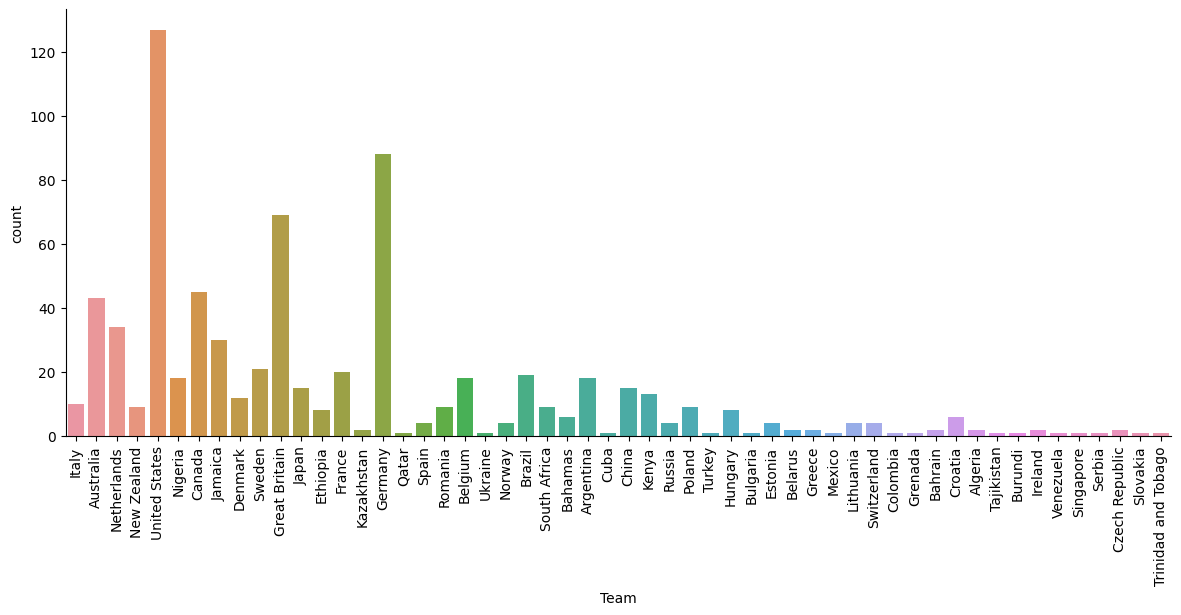

In [15]:
# Generate a bar plot indicating the number of medals won by each country in the top five sports in 2016:

g = sns.catplot(data=olympics_top_sports_winners_2016, x = "Team", kind="count", aspect=2.5)
g.set_xticklabels(rotation=90)

Considering the five sports, the US won the most medals, followed by Germany, Great Britain, Canada, and Australia.

<Axes: xlabel='Sport', ylabel='Weight'>

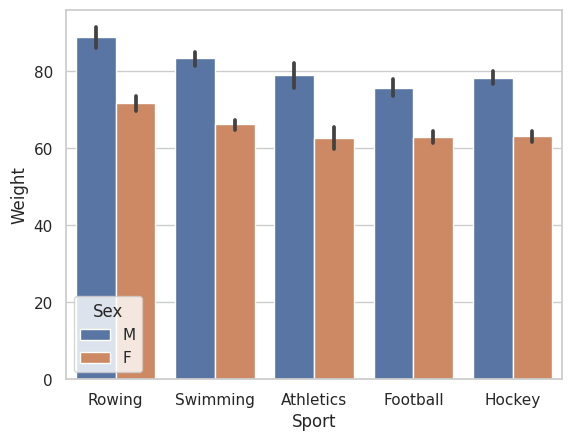

In [16]:
# Generate a bar plot indicating the average weight of players, categorized as male 
# and female, winning in the top five sports in 2016:

sns.set(style="whitegrid")
sns.barplot(x="Sport", y="Weight", data=olympics_top_sports_winners_2016, estimator=mean, hue='Sex')

The bar plot indicates the highest athlete weight in rowing, followed by swimming, and then the other remaining sports. The trend is similar across both male and female players.